# Sentinel-1 InSAR processing

This notebook provides an example to compute the geocoded InSAR coherence and the geocoded (flattened + terrain corrected + multilooked + filtered) interferogram on a user defined InSAR pairs

In [1]:
import openeo

import rasterio
from rasterio.plot import show

Create a datacube with the geocoded InSAR coherence and interferograms for a list of InSAR pairs

In [2]:
url = "https://openeo.dataspace.copernicus.eu"
connection = openeo.connect(url).authenticate_oidc()

datacube = openeo.rest.datacube.DataCube(
  openeo.rest.datacube.PGNode(
    "insar_coherence",
    arguments={
      "burst_id": 249435,
      "sub_swath": "IW2",
      "InSAR_pairs": [
        ["2024-08-09", "2024-08-21"],
        ["2024-08-09", "2024-09-02"],
      ],
      "polarization": "vv"
    },
  ),
  connection=connection,
)

datacube = datacube.save_result(format='GTiff')

Authenticated using refresh token.


In [3]:
job = datacube.create_job(title='InSAR_coherence')
job.start_and_wait()
job.get_results().download_files()

0:00:00 Job 'j-2506060755444ac6a5fd7bdb05c705e1': send 'start'
0:00:13 Job 'j-2506060755444ac6a5fd7bdb05c705e1': created (progress 0%)
0:00:18 Job 'j-2506060755444ac6a5fd7bdb05c705e1': created (progress 0%)
0:00:25 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:00:33 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:00:43 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:00:55 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:01:10 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:01:30 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:01:54 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:02:24 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:03:01 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:03:48 Job 'j-2506060755444ac6a5fd7bdb05c705e1': running (progress N/A)
0:04:46 Job 'j-2506060755444ac6a5fd7bdb05c705e1': finished (pro

[PosixPath('/home/jovyan/mystorage/ClouDInSAR/demo/openEO_2024-08-09Z.tif'),
 PosixPath('/home/jovyan/mystorage/ClouDInSAR/demo/job-results.json')]

## Visualization of the result

### 1) Visualization in the Jupyter notebook

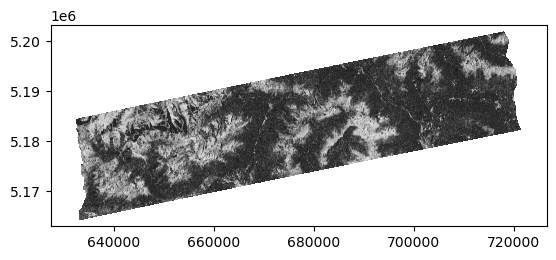

In [4]:
with rasterio.open('openEO_2024-08-09Z.tif') as src:
    show(src.read(1), transform=src.transform, cmap='gray')

### 2) Visualization in the OpenEO Web Editor

Open the  [OpenEo Web Editor](https://openeo.dataspace.copernicus.eu/), search the job that has been executed and click on *View the results*

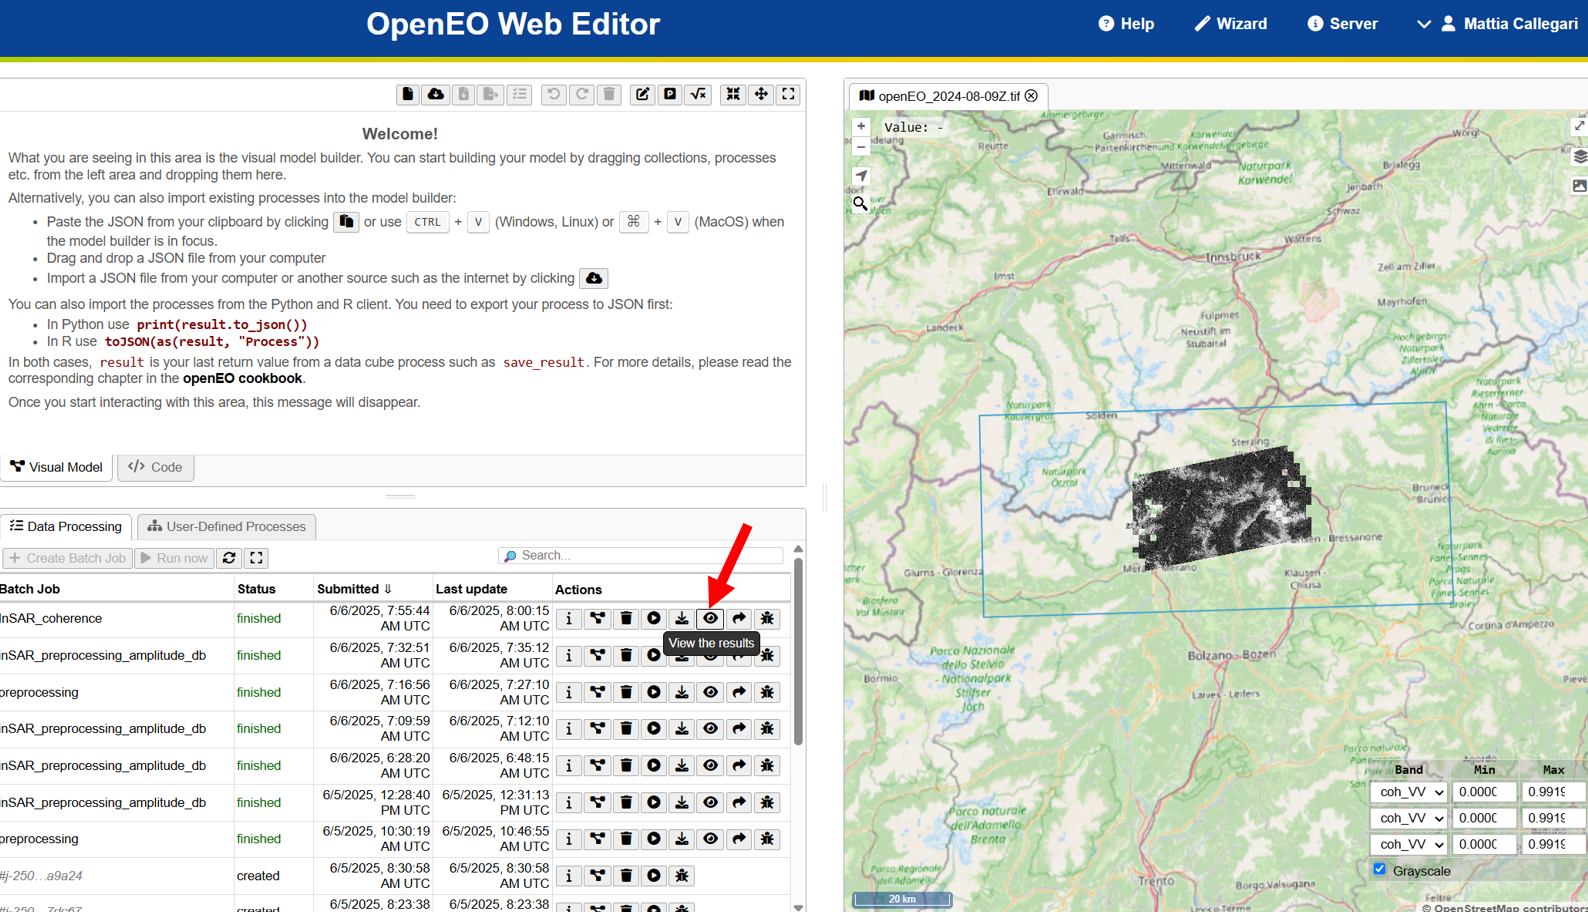

### 3) Visualization in GIS software (QGIS)

Visualize the job result with  `job.get_results()` and click on "Copy URL"

In [7]:
job.get_results()

<JobResults for job 'j-2506060755444ac6a5fd7bdb05c705e1'>

<br><br>
Alternatively the URL can be directly visualized with `job.get_results().get_assets()`

In [9]:
job.get_results().get_assets()

[<ResultAsset 'openEO_2024-08-09Z.tif' (type image/tiff; application=geotiff) at 'https://openeo.dataspace.copernicus.eu/openeo/1.2/jobs/j-2506060755444ac6a5fd7bdb05c705e1/results/assets/YjFkN2E3YzMtMGMxYi00MjgzLWE0NDItM2I1YmYxZmE4ZjNj/7a9292bcb0276a5206f5d83cf31230f6/openEO_2024-08-09Z.tif?expires=1749804262'>]

Then open QGIS. Click on *Open Data Source Manager* and select the protocol *HTTPS* as *Source Type*. Then paste the URL and add the layer

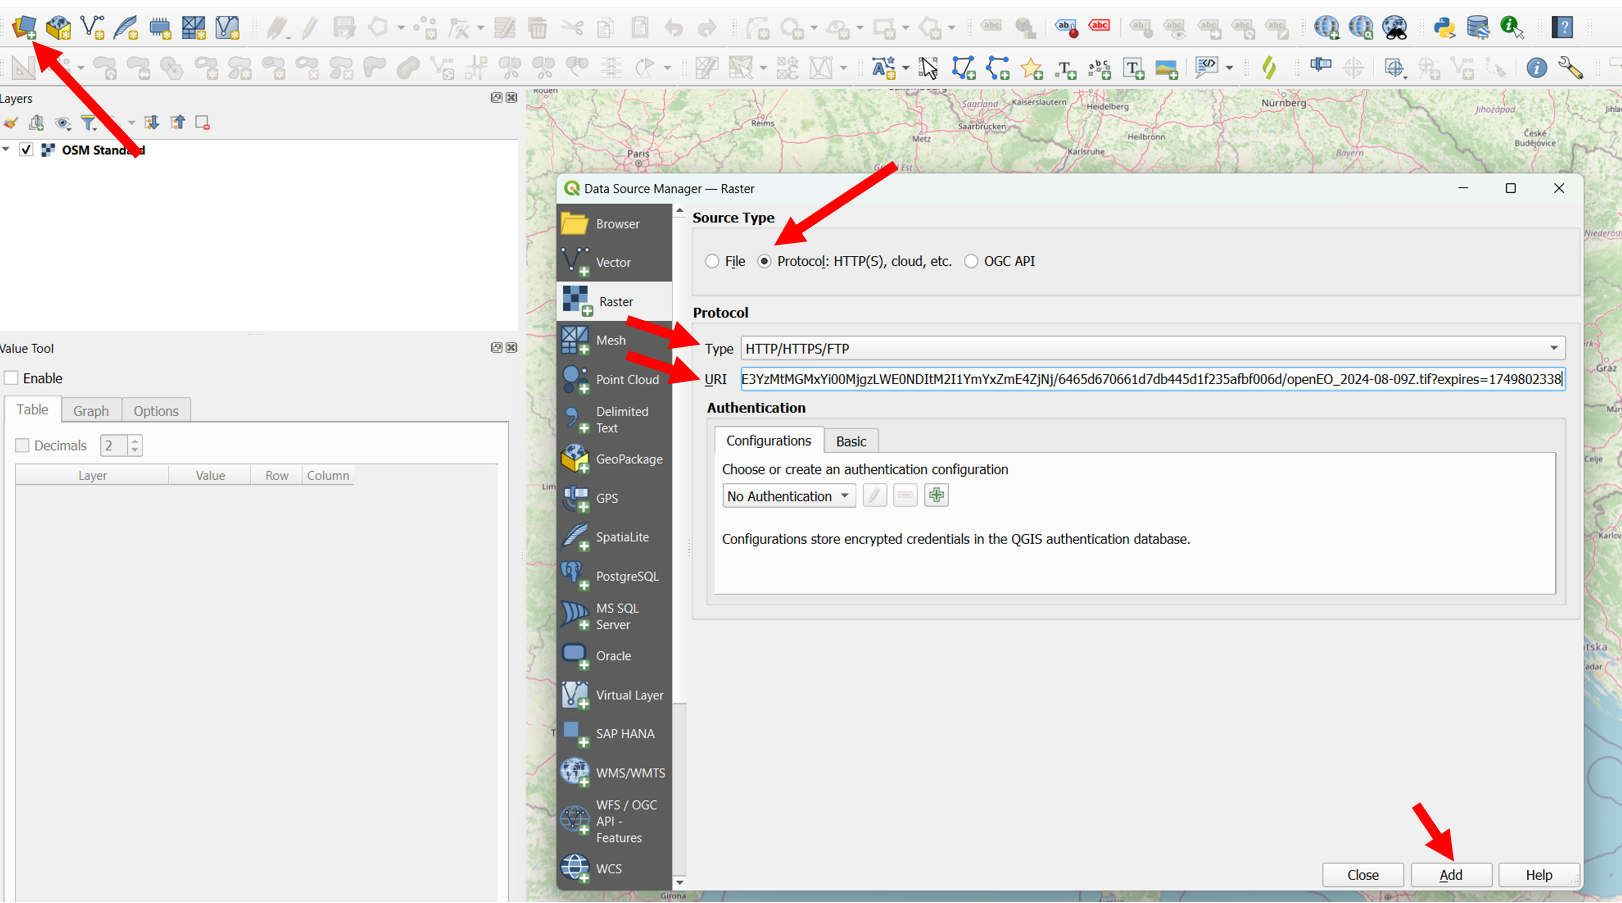